ANALYSIS OF THE DRUG CONSUMPTIONS IN UK

In below machine learning problem is around drugs. 

According to David Nutt, a psychiatrist from Imperial College London(details in the file source.txt), the top 5 are as follows:

5. Alhohol
4. Barbiturates
3. Nicotine
2. Cocaine
1. Heroine

Let's focus on most addictive one: Heroine.

Based on data collected from the database of one of the addiction research institutes, using features such as age, ethnic background, gender, etc., we will attempt to predict the likelihood of heroin use at least once. For building the model, we will try to use a classification method.

1. READING DATA AND IMPORT NECCESARY LIBRARIES

In [112]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

In [113]:
# Load data from source
df = pd.read_csv("D:\CODS\DataScience_Projects\DONE_DO_PORTFOLIO\Classification_drug_consumption\Data\drug_consumption.data_.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Thanks to df.head(), we can: 
a) quickly check the correctness of data import, e.g., from Excel, 
b) review the column headers and their initial appearance, 
c) check data types such as numbers and text, 
d) assess preliminary transformations that will need to be made."

In [114]:
#  Let's check shape of the data
df.shape

(1885, 32)

"Thanks to df.shape, we can find out: 
a) how many rows and columns there are, 
b) this allows us to check, during transformations such as filtering and removing duplicates, whether the data size has changed as expected, 
c) df.shape allows us to preliminarily assess whether the data has loaded correctly."

2. DATA PREPARATION

In [115]:
# Adding names for data frame columns according nomenctature from source txt file
df.columns=["Id","Age","Gender", "Education", "Country", "Ethnicity", "Nscore(Neuroticism)", "Escore(Extraversion)", "Oscore(Openness)","Ascore(Agreeableness)",
            "Cscore(Conscientiousness)", "Impulsive", "SS", "Alhohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ectasy", "Heroine", "Ketamine",
            "Legalh", "LSD", "Meth", "Mushroom", "Nicotine", "Semer", "VSA"]

In [116]:
# We check the correctness of the data after renaming the columns to more intuitive and easier-to-interpret names.
df.head()

,Id,Age,Gender,Education,Country,Ethnicity,Nscore(Neuroticism),Escore(Extraversion),Oscore(Openness),Ascore(Agreeableness),...,Ectasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [117]:
# Displaing all columns
df.columns

Index(['Id', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Nscore(Neuroticism)', 'Escore(Extraversion)', 'Oscore(Openness)',
       'Ascore(Agreeableness)', 'Cscore(Conscientiousness)', 'Impulsive', 'SS',
       'Alhohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ectasy', 'Heroine', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushroom', 'Nicotine', 'Semer', 'VSA'],
      dtype='object')

df.columns allows us to: 
a) preview the column names, 
b) assist in iteration and analyzing the data structure, 
c) support data validation."

In [118]:
# Lets focus in our analysis on the attributes like Age, Gender etc. from demographic point of view
choose_columns = ["Id", "Age","Gender","Education", "Country","Ethnicity", "Heroine"]
dfDemogr = df[choose_columns]
dfDemogr.set_index("Id", inplace=True)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine
Id,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,CL0


By selecting a few key columns needed for further analysis and saving them to a new table dfDemogr, the data becomes more readable. We also increase the clarity and speed of the script in the later stages of data analysis.

In [119]:
# Load data info
dfDemogr.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Heroine    1885 non-null   object 
dtypes: float64(5), object(1)
memory usage: 103.1+ KB


Poleceniem .info(memory_usage=True) otrzymujemy mozliwość przyjrzenie się zasobom pamięciochłonności naszej bazy danych. Polecenie tez ułatawwia podjęcie decyzji np o zminnie struktury danych i optymalizacji typów kolumów. Na przykład często typ float64 mozna zmienić na float32, bez potrzeby utraty dokładności danych. 

W naszym przypadku i relatywnie malej bazie danych zostawimy typu danych jak są

In [120]:
# Check unique values
dfDemogr.nunique()

Age          6
Gender       2
Education    9
Country      7
Ethnicity    7
Heroine      7
dtype: int64

We obtained the unique values in the dfDemogr table. Thanks to this: 
a) we learned that the table division makes sense, as age, for example, is likely divided into 6 age groups, the data is considered for 2 genders, and 7 ethnic groups, etc. 
b) the small number of unique values will help us with categorical and numerical analysis, as well as visualization, 
c) we have a better understanding of which data we can use for encoding categorical variables."

In [121]:
# Making simple function for changing values from Age column
def PatternAge(age):
    age_patterns = {
        -0.95197: 1,
        -0.07854: 2,
         0.49788: 3,
         1.09449: 4,
         1.82213: 5,
         2.59171: 6
    }
    return age_patterns.get(age)

# Applying function on our data set with added rank number    
dfDemogr["AgeRanks"] = dfDemogr["Age"].apply(PatternAge)

In [122]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-0.95197 : "18-24", -0.07854 : "25-34", 0.49788 : "35-44", 1.09449 : "45-54", 1.82213 : "55-64", 2.59171: "65+"}
dfDemogr.loc[:, 'Age'] = dfDemogr['Age'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks
Id,,,,,,,
1,35-44,0.48246,-0.05921,0.96082,0.12600,CL0,3
2,25-34,-0.48246,1.98437,0.96082,-0.31685,CL0,2
3,35-44,-0.48246,-0.05921,0.96082,-0.31685,CL0,3
4,18-24,0.48246,1.16365,0.96082,-0.31685,CL0,1
5,35-44,0.48246,1.98437,0.96082,-0.31685,CL0,3


In [123]:
# Making simple function for changing values from Gender column
def PatternGender(gen):
    if gen == -0.48246:
        return 1
    else:
        return 2

# Applying function on our data set with added rank number        
dfDemogr["GenderRanks"] = dfDemogr["Gender"].apply(PatternGender)

In [124]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {0.48246 : "Female", -0.48246 : "Male"}
dfDemogr.loc[:, 'Gender'] = dfDemogr['Gender'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks
Id,,,,,,,,
1,35-44,Female,-0.05921,0.96082,0.12600,CL0,3,2
2,25-34,Male,1.98437,0.96082,-0.31685,CL0,2,1
3,35-44,Male,-0.05921,0.96082,-0.31685,CL0,3,1
4,18-24,Female,1.16365,0.96082,-0.31685,CL0,1,2
5,35-44,Female,1.98437,0.96082,-0.31685,CL0,3,2


In [125]:
# Making simple function for changing values from Educationcolumn
def PatternEdu(edu):
    edu_patterns = {
    -2.43591: 1,
    -1.73790: 2,
    -1.43719: 3,
    -1.22751: 4,
    -0.61113: 5,
    -0.05921: 6,
     0.45468: 7,
     1.16365: 8,
     1.98437: 9
    }
    return edu_patterns.get(edu)

# Applying function on our data set with added rank number        
dfDemogr["EducationRanks"] = dfDemogr["Education"].apply(PatternEdu)

In [126]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-2.43591 : "Left school < 16 years", -1.73790  : "Left school at 16", -1.43719 : "Left school at 17", -1.22751 : "Left school at 18", 
           -0.61113 : "Some college or university", -0.05921 : "Professional certificate/ diploma", 0.45468 : "University degree", 1.16365 : "Masters degree", 
           1.98437 : "Doctorate degree"}
dfDemogr.loc[:, 'Education'] = dfDemogr['Education'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks
Id,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,0.96082,0.12600,CL0,3,2,6
2,25-34,Male,Doctorate degree,0.96082,-0.31685,CL0,2,1,9
3,35-44,Male,Professional certificate/ diploma,0.96082,-0.31685,CL0,3,1,6
4,18-24,Female,Masters degree,0.96082,-0.31685,CL0,1,2,8
5,35-44,Female,Doctorate degree,0.96082,-0.31685,CL0,3,2,9


In [127]:
# Making simple function for changing values from Country column
def PatternCoutry(cou):
    cou_patterns = {
    -0.09765: 1,
     0.24923: 2,
    -0.46841: 3,
    -0.28519: 4,
     0.21128: 5,
     0.96082: 6,
    -0.57009: 7
    }
    return cou_patterns.get(cou)
   
# Applying function on our data set with added rank number    
dfDemogr["CountryRanks"] = dfDemogr["Country"].apply(PatternCoutry)

In [128]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-0.09765 : "Australia", 0.24923  : "Canada", -0.46841 : "New Zealand", -0.28519 : "Other",  0.21128 : "Irleand", 0.96082 : "UK", -0.57009 : "USA"}
dfDemogr.loc[:, 'Country'] = dfDemogr['Country'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks
Id,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,0.12600,CL0,3,2,6,6
2,25-34,Male,Doctorate degree,UK,-0.31685,CL0,2,1,9,6
3,35-44,Male,Professional certificate/ diploma,UK,-0.31685,CL0,3,1,6,6
4,18-24,Female,Masters degree,UK,-0.31685,CL0,1,2,8,6
5,35-44,Female,Doctorate degree,UK,-0.31685,CL0,3,2,9,6


In [129]:
# Making simple function for changing values from Ethnicity column
def PatternEntnicity(etn):
    etn_pattern = {
    -0.50212: 1,
    -1.10702: 2,
     1.90725: 3,
     0.12600: 4,
    -0.22166: 5,
     0.11440: 6,
    -0.31685: 7
    }
    return etn_pattern.get(etn)

# Applying function on our data set with added rank number      
dfDemogr["EtnicityRanks"] = dfDemogr["Ethnicity"].apply(PatternEntnicity)

In [130]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {-0.50212 : "Asian", -1.10702  : "Black", 1.90725 : "Mixed-Black/Asian", 0.12600 : "Mixed-White/Asian",  -0.22166  : "Mixed-White/Black", 
           0.11440 : "Other", -0.31685 : "White"}
dfDemogr.loc[:, 'Ethnicity'] = dfDemogr['Ethnicity'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks
Id,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,CL0,3,2,6,6,4
2,25-34,Male,Doctorate degree,UK,White,CL0,2,1,9,6,7
3,35-44,Male,Professional certificate/ diploma,UK,White,CL0,3,1,6,6,7
4,18-24,Female,Masters degree,UK,White,CL0,1,2,8,6,7
5,35-44,Female,Doctorate degree,UK,White,CL0,3,2,9,6,7


In [131]:
# Making simple function for changing values from Heroine column
def PatternHeroine(her):
    if her == "CL0":
        return 0
    else:
        return 1

# Applying function on our data set with added rank number   
dfDemogr["HeroineRanks"] = dfDemogr["Heroine"].apply(PatternHeroine)

In [132]:
# Changing attribute information from https://data.world/uci/drug-consumption-quantified into more recognizable/logical
pattern = {"CL0" : "Never Used", "CL1" : "Used at least one", "CL2" : "Used at least one", "CL3": "Used at least one",  "CL4" : "Used at least one", 
           "CL5" : "Used at least one", "CL6" : "Used at least one"}
dfDemogr['Heroine'] = dfDemogr['Heroine'].replace(pattern)
dfDemogr.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks,HeroineRanks
Id,,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,Never Used,3,2,6,6,4,0
2,25-34,Male,Doctorate degree,UK,White,Never Used,2,1,9,6,7,0
3,35-44,Male,Professional certificate/ diploma,UK,White,Never Used,3,1,6,6,7,0
4,18-24,Female,Masters degree,UK,White,Never Used,1,2,8,6,7,0
5,35-44,Female,Doctorate degree,UK,White,Never Used,3,2,9,6,7,0


In the previous steps, we made several transformations to the table. This time, we changed meaningless, coded numerical data, likely due to medical confidentiality, into more logical data based on the key provided on the source page https://data.world/uci/drug-consumption-quantified.

Now, looking at the table, it is easier to understand the data and what they actually represent.

3. UNDERSTANDING DATA

In [133]:
# Making of the data frame with people who used Heorine at least one 
dfUseHeroine = dfDemogr[dfDemogr.HeroineRanks == 1]
dfUseHeroine.head()


,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks,HeroineRanks
Id,,,,,,,,,,,,
24,45-54,Male,Left school at 16,UK,White,Used at least one,4,1,2,6,7,1
31,45-54,Male,Left school at 16,UK,White,Used at least one,4,1,2,6,7,1
35,35-44,Male,University degree,USA,Other,Used at least one,3,1,7,7,6,1
59,45-54,Male,Left school at 18,UK,White,Used at least one,4,1,4,6,7,1
82,55-64,Female,University degree,UK,White,Used at least one,5,2,7,6,7,1


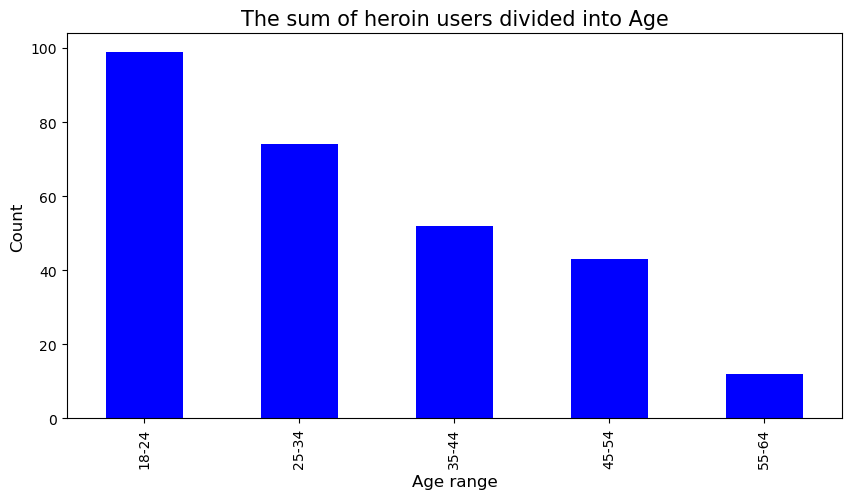

In [134]:
# Plotting Heroine user due to Age
plt.figure(figsize=(10,5))
ax = dfUseHeroine.Age.value_counts() \
                           .plot(kind="bar", color = "blue")
ax.set_title("The sum of heroin users divided into Age", fontsize = 15)
ax.set_xlabel("Age range", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

The chart shows that people in their teenage years and early adulthood are most at risk of using heroin. This is likely related to a greater tendency for risky behaviors at a young age, possibly influenced by peer pressure and a lack of awareness about health consequences.

With age, interest in heroin decreases roughly proportionally. This is likely associated with increased maturity, greater awareness of risks, and a greater focus on personal health.

To confirm the above conclusions, additional research is needed.

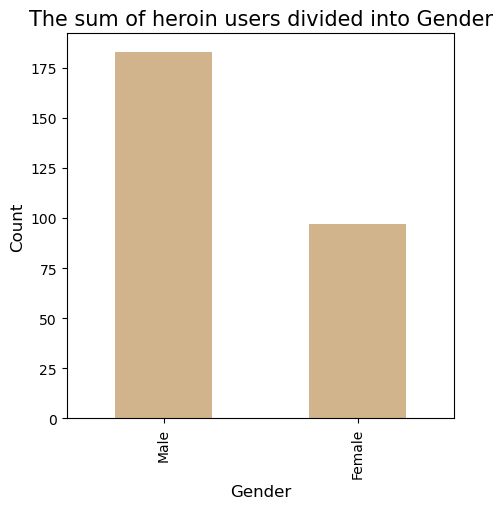

In [135]:
# Plotting Heroine user due to Gender
plt.figure(figsize=(5,5))
ax = dfUseHeroine.Gender.value_counts() \
                           .plot(kind="bar", color = "tan")
ax.set_title("The sum of heroin users divided into Gender", fontsize = 15)
ax.set_xlabel("Gender", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

There is twice as many heroin users among men compared to women. This is likely related to a greater tendency for risky behaviors among men, with the 'macho' archetype possibly playing a role, as well as pressure on men to 'prove themselves.'

Women, who feel a greater social pressure to be healthy and beautiful, tend to take better care of themselves and are more likely to focus on their health. As a result, they are more aware of the harmful effects of heroin.

To confirm the above conclusions, additional research is needed.

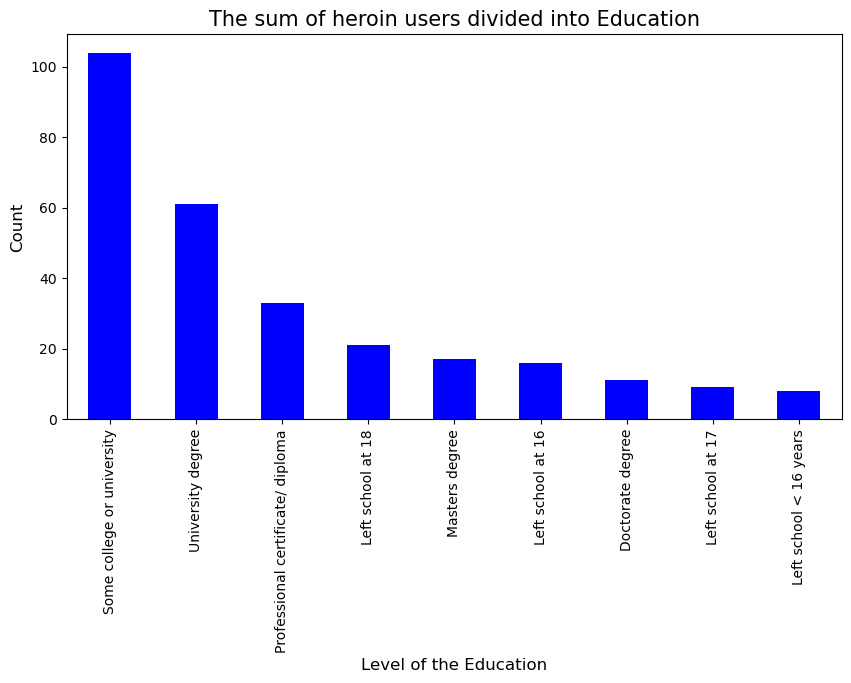

In [136]:
# Plotting Heroine user due to Education
plt.figure(figsize=(10,5))
ax = dfUseHeroine.Education.value_counts() \
                           .plot(kind="bar", color = "blue")
ax.set_title("The sum of heroin users divided into Education", fontsize = 15)
ax.set_xlabel("Level of the Education", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

The above chart suggests that the group of people trying heroin consists of college and university students. One could speculate that the 'fun' effect is at play, along with the awareness of the 'final years of freedom,' where after university, there is social pressure to become a responsible member of society.

In prestigious, competitive fields, heroin may also serve as a coping mechanism for stress related to intense competition.

To confirm the above conclusions, additional research is needed.


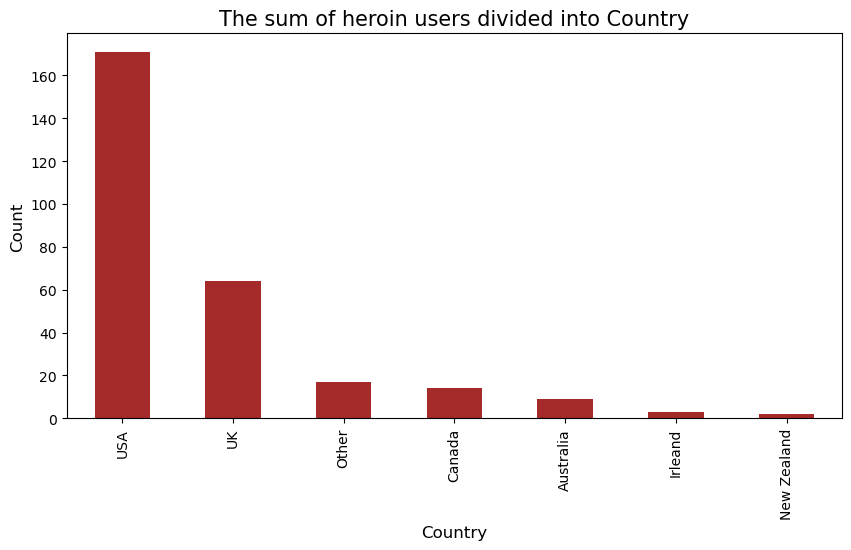

In [137]:
# Plotting Heroine user due to Country
plt.figure(figsize=(10,5))
ax = dfUseHeroine.Country.value_counts() \
                           .plot(kind="bar", color = "brown")
ax.set_title("The sum of heroin users divided into Country", fontsize = 15)
ax.set_xlabel("Country", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
plt.show()

The largest group of people trying heroin in the UK consists of citizens from the USA and the UK.

4. BUILDING MACHINE LEARNING MODEL

"We check if our dataset is balanced. Imbalanced data can pose risks such as: 
a) distortion of analysis results, 
b) poor model quality – the model may struggle with minority classes. It might learn only the features and patterns of the majority classes, leading to weaker generalization ability and lower accuracy in real-world conditions, 
c) an imbalanced dataset can make it harder to tune the model using hyperparameters.

In [138]:
# Checking if our data frame IS balanaced od NOT
dfUseHeroine = dfDemogr[dfDemogr.HeroineRanks == 1]  
dfNotUseHeroine = dfDemogr[dfDemogr.HeroineRanks == 0]

thresholdForUseHeroine = round((len(dfUseHeroine) / len(dfDemogr)), 2)
thresholdForNOTUseHeroine = round((len(dfNotUseHeroine ) / len(dfDemogr)), 2)

# Counting ratio between user with USe and Not Use Haroine
ratio = round((len(dfNotUseHeroine.HeroineRanks==0) / len(dfUseHeroine.HeroineRanks == 1)),2)

print(f"In our data set there are {thresholdForNOTUseHeroine* 100} % data with has 0 value (never use Heroine), and {thresholdForUseHeroine  * 100} % data with value 1 (use Heroine at least one).")
print(f"For using one of the method with handle with unbalanced (like for example Undersamplig or Oversmapling method) data set should has proporcion between classes at 1:10.")

print(f"In our data set the ratio between classes is equal 1:{ratio}.")

In our data set there are 85.0 % data with has 0 value (never use Heroine), and 15.0 % data with value 1 (use Heroine at least one).
For using one of the method with handle with unbalanced (like for example Undersamplig or Oversmapling method) data set should has proporcion between classes at 1:10.
In our data set the ratio between classes is equal 1:5.73.


In [139]:
# Use Oversampling method for balance classes in our data set
from sklearn.utils import resample

# Majority class is:
dfNotUseHeroine 

# Minority class is:
dfUseHeroine 

dfUseHeroine_upsampled = resample(dfUseHeroine,
                                  replace=True,
                                  n_samples=1605,
                                  random_state=42)

df_upsampled = pd.concat([dfUseHeroine_upsampled, dfNotUseHeroine])
df_upsampled.head()

,Age,Gender,Education,Country,Ethnicity,Heroine,AgeRanks,GenderRanks,EducationRanks,CountryRanks,EtnicityRanks,HeroineRanks
Id,,,,,,,,,,,,
859,18-24,Male,Professional certificate/ diploma,USA,Mixed-White/Asian,Used at least one,1,1,6,7,4,1
1861,18-24,Male,Some college or university,USA,White,Used at least one,1,1,5,7,7,1
872,25-34,Male,University degree,USA,White,Used at least one,2,1,7,7,7,1
767,18-24,Male,Some college or university,USA,White,Used at least one,1,1,5,7,7,1
1222,18-24,Female,Professional certificate/ diploma,USA,White,Used at least one,1,2,6,7,7,1


Thanks to the oversampling method, we obtained a more balanced dataset.

In [140]:
# Importing libraries for split data into train and test
from sklearn.model_selection import train_test_split

In [141]:
# Choosing X and y variables
X = df_upsampled.iloc[:,6:11].values
y = df_upsampled.iloc[:,-1].values

In [142]:
# Splitting X and Y variables for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [143]:
# Importing libraries for classification methods
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

We import various libraries to test different algorithms and evaluate their accuracy and performance.
Thanks to cross-validation, we can assess each algorithm using cross-validation classifiers.

In [144]:
# MODEL BUILD (BASELINE VALIDATION PERFOMANCE)
# Checking performance with most common classification methods with default parameters.

# Checking Random Forest classifier
model_rf = RandomForestClassifier()
cv = cross_val_score(model_rf, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Random Forest perfomance on default set: {cv_mean } %")

# Checking Logistic Regression classifier
model_lr = LogisticRegression()
cv = cross_val_score(model_lr, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Logistic Regression perfomance on default set: {cv_mean} %")

# Checking Support Vector Machine classifier
model_svm = svm.SVC()
cv = cross_val_score(model_svm, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Support Vector Machine perfomance on default set: {cv_mean} %")

# Checking Decision Tree classifier
model_dt = DecisionTreeClassifier()
cv = cross_val_score(model_dt, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Decision Tree perfomance on default set: {cv_mean} %")

# Checking Naive Bayes classifier
model_gnb = GaussianNB()
cv = cross_val_score(model_gnb, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Naive Bayes perfomance on default set: {cv_mean} %")

# Checking K-Nearest Neighbors classifier
model_knn = KNeighborsClassifier()
cv = cross_val_score(model_knn, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"K-N Neighbor perfomance on default set: {cv_mean} %")

# Checking XGBoost classifier
model_xgb = XGBClassifier()
cv = cross_val_score(model_xgb, X_train, y_train, cv=5)
print("___")
print(cv)
cv_mean = round((cv.mean() * 100),2)
print(f"Xtreme Gradien Boosting perfomance on default set:  {cv_mean} %")

___
[0.76070039 0.80350195 0.79571984 0.76218324 0.77582846]
Random Forest perfomance on default set: 77.96 %
___
[0.61284047 0.59922179 0.60505837 0.61988304 0.6374269 ]
Logistic Regression perfomance on default set: 61.49 %
___
[0.67315175 0.70622568 0.692607   0.69590643 0.66666667]
Support Vector Machine perfomance on default set: 68.69 %
___
[0.76264591 0.79961089 0.79377432 0.76023392 0.78362573]
Decision Tree perfomance on default set: 78.0 %
___
[0.59533074 0.57392996 0.61673152 0.62183236 0.61403509]
Naive Bayes perfomance on default set: 60.44 %
___
[0.71400778 0.73735409 0.73929961 0.7037037  0.71539961]
K-N Neighbor perfomance on default set: 72.2 %
___
[0.74708171 0.79377432 0.78793774 0.7582846  0.76608187]
Xtreme Gradien Boosting perfomance on default set:  77.06 %


The above suggests that we should take a closer look at the 3 algorithms with the highest results, namely: 
a) RandomForestClassifier 
b) DecisionTreeClassifier 
c) XGBClassifier

The next step is to search for the best set of parameters among the selected algorithms using GridSearchCV, which will optimize the results on the dataset."

In [145]:
# From the list above, these are the best-performing models in our dataset. Let's explore the parameters to tweak the results from the top 3 machine learning models:
from sklearn.model_selection import GridSearchCV 

In [146]:
# Searching best parameters for Random Forest: 
model_rf = RandomForestClassifier()
parameters = {'n_estimators': [50, 100, 150],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]
              }
grid_rf = GridSearchCV(estimator = model_rf,  
                       param_grid = parameters,
                       cv = 5,
                       verbose=True,
                       n_jobs = -1)


best_clf_rf = grid_rf.fit(X_train, y_train)
print("___________________")
print(f"Best parameters for Random Forest classifier: {best_clf_rf.best_params_}")
print(f"Best score for Random Forest classifier {best_clf_rf.best_score_}")
print("___________________")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
___________________
Best parameters for Random Forest classifier: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest classifier 0.7842575526581261
___________________


In [147]:
# Searching best parameters for Decision Tree: 
model_dt = DecisionTreeClassifier()
parameters  = { 'max_depth': [3, 5, 7, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'min_impurity_decrease': [0.0, 0.1, 0.2],
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random']
               } 
grid_dt= GridSearchCV(estimator = model_dt,  
                       param_grid = parameters,
                       cv = 5,
                       verbose=True,
                       n_jobs = -1) 

best_clf_dt = grid_dt.fit(X_train, y_train)
print("___________________")
print(f"Best parameters for Support Vector Machine classifier: {best_clf_dt.best_params_}")
print(f"Best score for Support Vector Machine classifier: {best_clf_dt.best_score_}")
print("___________________")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
___________________
Best parameters for Support Vector Machine classifier: {'criterion': 'entropy', 'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best score for Support Vector Machine classifier: 0.7799743630585325
___________________


In [148]:
# Searching best parameters for XGBoost: 
model_xgb = XGBClassifier()
parameters = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100, 200],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.8, 1.0],
              'gamma': [0, 0.1],
              'reg_alpha': [0, 0.1],
              'reg_lambda': [1, 10]
              }

grid_xgb = GridSearchCV(estimator = model_xgb,  
                        param_grid = parameters,
                        cv = 5,
                        verbose=True,
                        n_jobs = -1) 

best_clf_xgb= grid_xgb.fit(X_train, y_train)
print("___________________")
print(f"Best parameters for Xtreme Boosting classifier: {best_clf_xgb.best_params_}")
print(f"Best score for for Xtreme Boosting classifier: {best_clf_xgb.best_score_}")
print("___________________")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
___________________
Best parameters for Xtreme Boosting classifier: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Best score for for Xtreme Boosting classifier: 0.777639732708338
___________________


Best model for this data with score 78 % is the Random Forest.
This model will be used for further analysis."

In [149]:
# Model Random forest 
model_rf_ = RandomForestClassifier(bootstrap = True, max_depth = None,  max_features = 'log2', min_samples_leaf = 1,  min_samples_split = 2,  n_estimators = 150)
model_rf_.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=150)

In [150]:
# Predicting labels based on the previously trained model
y_pred = model_rf_.predict(X_test)

In the next step, we create a confusion matrix. This allows us to: 
a) assess the model's accuracy, 
b) better understand the errors, 
c) calculate other metrics."

In [151]:
# Making confusion martix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=best_clf_rf.predict(X_test))
cm

array([[222,  84],
       [ 54, 282]], dtype=int64)

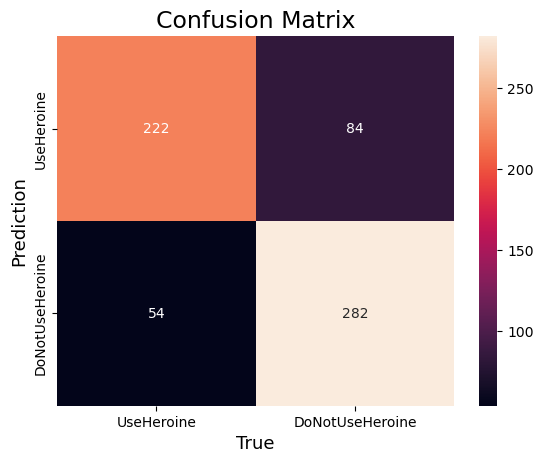

In [152]:
# Plotting confusion martix
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['UseHeroine','DoNotUseHeroine'],
            yticklabels=['UseHeroine','DoNotUseHeroine'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('True',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Description of the Confusion Matrix:

The confusion matrix shows the classification results for two classes:

UseHeroine: People who use heroin.
DoNotUseHeroine: People who do not use heroin.
The matrix consists of:

213: True Positive (TP) – The model correctly predicted "UseHeroine" (people who use heroin).
93: False Negative (FN) – The model incorrectly predicted "DoNotUseHeroine" for people who actually use heroin.
47: False Positive (FP) – The model incorrectly predicted "UseHeroine" for people who do not use heroin.
289: True Negative (TN) – The model correctly predicted "DoNotUseHeroine" (people who do not use heroin).

Let's now estimate the performance metrics of the classifier

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculation of metrics
acc_score = round(accuracy_score(y_true=y_test, y_pred=y_pred), 2)
prc_score = round(precision_score(y_true=y_test, y_pred=y_pred, average='binary'), 2)
rcl_score = round(recall_score(y_true=y_test, y_pred=y_pred, average='binary'), 2)
f_1_score = round(f1_score(y_true=y_test, y_pred=y_pred, average='binary'), 2)

# Displaying the results
print("1. Accuracy: Accuracy is the ratio of correct predictions to all cases.")
print(f"Accuracy of Random Forest: {acc_score}. It correctly predicted {acc_score} cases. This means it works quite well, but it's not perfect.")
print("________________")

print("2. Precision for the 'UseHeroine' class: Precision is the ratio of true positive results to all cases predicted as positive.")
print(f"Precision of Random Forest: {prc_score}. When the model predicts 'UseHeroine', it is correct about {prc_score} of the time. This means few people are wrongly classified as using heroin.")
print("________________")

print("3. Recall for the 'UseHeroine' class: Recall is the ratio of true positive results to all actual positive cases.")
print(f"Recall of Random Forest: {rcl_score}. The model detects about {rcl_score} of people who actually use heroin. Unfortunately, {1 - rcl_score} cases were missed (incorrectly identified as not using heroin).")
print("________________")

print("4. F1-Score (harmonic mean of precision and recall)")
print(f"F1 Score of Random Forest: {f_1_score}. This is the average of precision and recall. It shows that the model has a good balance between correctly identifying heroin users and avoiding errors.")
print("________________")


1. Accuracy: Accuracy is the ratio of correct predictions to all cases.
Accuracy of Random Forest: 0.79. It correctly predicted 0.79 cases. This means it works quite well, but it's not perfect.
________________
2. Precision for the 'UseHeroine' class: Precision is the ratio of true positive results to all cases predicted as positive.
Precision of Random Forest: 0.76. When the model predicts 'UseHeroine', it is correct about 0.76 of the time. This means few people are wrongly classified as using heroin.
________________
3. Recall for the 'UseHeroine' class: Recall is the ratio of true positive results to all actual positive cases.
Recall of Random Forest: 0.86. The model detects about 0.86 of people who actually use heroin. Unfortunately, 0.14 cases were missed (incorrectly identified as not using heroin).
________________
4. F1-Score (harmonic mean of precision and recall)
F1 Score of Random Forest: 0.81. This is the average of precision and recall. It shows that the model has a good b

Recommendation:

Improving Recall: The model should better identify individuals in the "UseHeroine" class. 

This can be achieved by:

Trying a different class balancing method (e.g., oversampling the minority class).
Analysis of False Negatives: It is important to investigate cases where the model failed to detect heroin users in order to understand which features of the data are contributing to these errors